# Nearest Neighbors

In this example we predict house prices using the sklearn.datasets.load_boston dataset.

## How does it work?

Using nearest neighbors methods, we try predicting the value of a vector of output variables $Y$ from a vector of input variables $X$ using the following model

$$ Y(X) = \frac{1}{k} \sum_{x_i \in N_k(X)}({y_i}) $$

where $ N_k(X) $ is a function that gives us the $k$ closest points to $X$ from our dataset.

In [3]:
import numpy as np
import sklearn.datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [1]:
def knn(k, X, y, x):
    X_with_indexes = [(X[i], i) for i in range(len(X))]
    
    sorted_X_with_indexes = sorted(
        X_with_indexes, 
        key=lambda x_with_index: np.sqrt(np.dot(x_with_index[0] - x, x_with_index[0] - x))
    )
    
    return sum([y[sorted_X_with_indexes[i][1]] for i in range(k)]) / k

3.1333333333333346


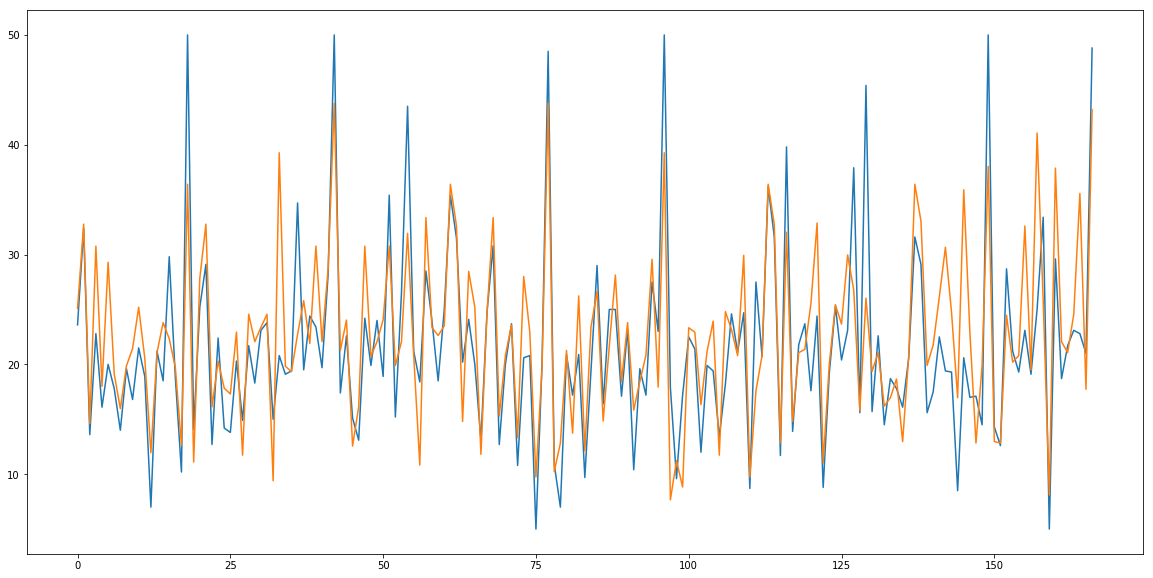

In [4]:
ds = sklearn.datasets.load_boston()
X = ds.data
y = ds.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

predicted_y = np.array([knn(3, X_train, y_train, x) for x in X_test])
ns = list(range(0, len(X_test)))

print(sklearn.metrics.median_absolute_error(y_test, predicted_y))

plt.figure(figsize=(20,10))
plt.plot(ns, y_test, ns, predicted_y)
plt.show()